In [215]:
using DataFrames
using Requests
using TimeSeries
using MarketTechnicals
using PyPlot

In [216]:
function getcsv(url)
    df = readtable(Requests.get_streaming(url))
end
function csvtotimearray(url)
    df = getcsv(url)
    timestamp = Date[Date(i) for i in df[1]] # parse dates
    colnames=AbstractString[string(i) for i in DataFrames.names(df)]
    dataarray=convert(Array, df[2:end])
    TimeArray(timestamp,dataarray,colnames[2:end])
end
function yahoo(symbol, startdate)
    str="a=$(Dates.month(startdate)-1)"*Dates.format(startdate, "&b=dd&c=yyyy")
    url="http://real-chart.finance.yahoo.com/table.csv?s="*symbol*"&"*str*"&g=d&ignore=.csv"
    csvtotimearray(url)
end
function quandl(symbol, startdate)
    str=Dates.format(startdate, "yyyy-mm-dd")
    url="https://www.quandl.com/api/v3/datasets/$symbol.csv?api_key=VKyXNok9WfyAwAHtZBCR&start_date=$str"
    csvtotimearray(url)
end
# extend a 1D series with its last element
function padseries(short, long, columns=Void)
    times=long.timestamp[searchsortedfirst(long.timestamp,short.timestamp[end])+1:end]
    TimeArray([short.timestamp;times], [short.values;fill(short.values[end], length(times))], columns==Void?short.colnames:columns)
end

padseries (generic function with 2 methods)

In [217]:
startdate=Date(2007,11,1) # set an early date to make use of all CBOE/GVZ data
symbol="SPY"
ohlcv=yahoo(symbol, startdate)

2149x6 TimeSeries.TimeArray{Real,2,DataType} 2007-11-01 to 2016-05-16

             Open      High      Low       Close     Volume          Adj_Close  
2007-11-01 | 153.29    153.41    150.59    151.03    333040800       126.2755   
2007-11-02 | 151.53    152.0     149.21    151.2     331228200       126.4176   
2007-11-05 | 149.64    151.16    148.97    150.05    226841000       125.4561   
2007-11-06 | 150.86    152.11    149.9     152.07    177800500       127.145    
⋮
2016-05-11 | 207.91    208.54    206.5     206.5     77749700        206.5      
2016-05-12 | 207.29    207.49    205.37    206.56    88260800        206.56     
2016-05-13 | 206.21    206.86    204.38    204.76    94791100        204.76     
2016-05-16 | 204.96    207.34    204.89    206.78    75737300        206.78     


In [218]:
eurusd=quandl("ECB/EURUSD", startdate)
eurusdarray=TimeArray(eurusd.timestamp,eurusd.values,["ECB/EURUSD"])

2184x1 TimeSeries.TimeArray{Float64,2,DataType} 2007-11-01 to 2016-05-16

             ECB/EURUSD  
2007-11-01 | 1.4423      
2007-11-02 | 1.4479      
2007-11-05 | 1.4488      
2007-11-06 | 1.4547      
⋮
2016-05-11 | 1.1409      
2016-05-12 | 1.1389      
2016-05-13 | 1.1348      
2016-05-16 | 1.1324      


In [219]:
gold=quandl("WGC/GOLD_DAILY_USD", startdate)
goldarray=TimeArray(gold.timestamp,gold.values./gold.values[1],["WGC/GOLD_DAILY_USD"])

2228x1 TimeSeries.TimeArray{Float64,2,DataType} 2007-11-01 to 2016-05-16

             WGC/GOLD_DAILY_USD  
2007-11-01 | 1.0                 
2007-11-02 | 1.0079              
2007-11-05 | 1.0184              
2007-11-06 | 1.0408              
⋮
2016-05-11 | 1.6158              
2016-05-12 | 1.6189              
2016-05-13 | 1.6019              
2016-05-16 | 1.6271              


In [220]:
ustreasury=quandl("USTREASURY/REALLONGTERM", startdate)
ustreasuryarray=TimeArray(ustreasury.timestamp,ustreasury.values,["USTREASURY/REALLONGTERM"])

2136x1 TimeSeries.TimeArray{Float64,2,DataType} 2007-11-01 to 2016-05-16

             USTREASURY/REALLONGTERM  
2007-11-01 | 2.12                     
2007-11-02 | 2.05                     
2007-11-05 | 2.06                     
2007-11-06 | 2.07                     
⋮
2016-05-11 | 0.62                     
2016-05-12 | 0.63                     
2016-05-13 | 0.6                      
2016-05-16 | 0.62                     


In [221]:
vix=quandl("CBOE/VIX", startdate)

2149x4 TimeSeries.TimeArray{Float64,2,DataType} 2007-11-01 to 2016-05-16

             VIX_Open  VIX_High  VIX_Low  VIX_Close  
2007-11-01 | 19.89     24.15     17.38    23.21      
2007-11-02 | 22.56     25.17     22.56    23.01      
2007-11-05 | 25.25     25.46     23.61    24.31      
2007-11-06 | 23.5      23.74     21.24    21.39      
⋮
2016-05-11 | 13.92     14.69     13.29    14.69      
2016-05-12 | 14.55     15.42     13.95    14.41      
2016-05-13 | 15.15     15.47     13.97    15.04      
2016-05-16 | 15.72     15.98     14.28    14.68      


In [222]:
vxn=quandl("CBOE/VXN", startdate)

2149x4 TimeSeries.TimeArray{Float64,2,DataType} 2007-11-01 to 2016-05-16

             Open     High     Low      Close    
2007-11-01 | 23.95    26.56    23.87    26.26    
2007-11-02 | 25.8     27.65    24.66    24.83    
2007-11-05 | 26.85    27.97    26.0     26.1     
2007-11-06 | 25.82    26.07    23.85    23.91    
⋮
2016-05-11 | 16.27    17.16    15.91    17.16    
2016-05-12 | 16.65    18.23    16.54    17.26    
2016-05-13 | 17.45    17.62    16.33    17.1     
2016-05-16 | 17.1     17.67    15.91    16.37    


In [223]:
ovx=quandl("CBOE/OVX", startdate) # CBOE/OVX since 2007-05-10

2150x1 TimeSeries.TimeArray{Float64,2,DataType} 2007-11-01 to 2016-05-16

             USO_VIX_OVX_  
2007-11-01 | 39.71         
2007-11-02 | 39.99         
2007-11-05 | 40.14         
2007-11-06 | 41.2          
⋮
2016-05-11 | 42.02         
2016-05-12 | 41.5          
2016-05-13 | 41.57         
2016-05-16 | 42.03         


In [224]:
evz=quandl("CBOE/EVZ", startdate) # CBOE/EVZ since 2007-11-01

2142x1 TimeSeries.TimeArray{Float64,2,DataType} 2007-11-01 to 2016-05-16

             EVZ      
2007-11-01 | 8.09     
2007-11-02 | 8.12     
2007-11-05 | 7.98     
2007-11-06 | 8.18     
⋮
2016-05-11 | 9.01     
2016-05-12 | 9.07     
2016-05-13 | 9.51     
2016-05-16 | 9.14     


In [225]:
gvz=quandl("CBOE/GVZ", startdate) # CBOE/GVZ since 2008-6-3

2004x1 TimeSeries.TimeArray{Float64,2,DataType} 2008-06-03 to 2016-05-16

             GVZ      
2008-06-03 | 22.89    
2008-06-04 | 22.69    
2008-06-05 | 22.78    
2008-06-06 | 23.6     
⋮
2016-05-11 | 18.35    
2016-05-12 | 17.84    
2016-05-13 | 18.29    
2016-05-16 | 18.49    


In [226]:
oil=quandl("OPEC/ORB", startdate)

2203x1 TimeSeries.TimeArray{Float64,2,DataType} 2007-11-01 to 2016-05-16

             Value     
2007-11-01 | 87.47     
2007-11-02 | 87.47     
2007-11-05 | 88.0      
2007-11-06 | 89.02     
⋮
2016-05-11 | 41.43     
2016-05-12 | 43.33     
2016-05-13 | 43.3      
2016-05-16 | 44.37     


In [227]:
ushybond=quandl("ML/HYOAS", startdate)

2227x1 TimeSeries.TimeArray{Float64,2,DataType} 2007-11-01 to 2016-05-13

             VALUE    
2007-11-01 | 4.53     
2007-11-02 | 4.65     
2007-11-05 | 4.69     
2007-11-06 | 4.66     
⋮
2016-05-10 | 6.46     
2016-05-11 | 6.4      
2016-05-12 | 6.36     
2016-05-13 | 6.41     


In [228]:
usaabond=quandl("ML/AAOAS", startdate)

2227x1 TimeSeries.TimeArray{Float64,2,DataType} 2007-11-01 to 2016-05-13

             VALUE   
2007-11-01 | 1.29    
2007-11-02 | 1.34    
2007-11-05 | 1.41    
2007-11-06 | 1.42    
⋮
2016-05-10 | 0.88    
2016-05-11 | 0.88    
2016-05-12 | 0.88    
2016-05-13 | 0.88    


In [229]:
aaii_weekly=quandl("AAII/AAII_SENTIMENT", startdate)

446x12 TimeSeries.TimeArray{Float64,2,DataType} 2007-11-01 to 2016-05-12

             Bullish  Neutral  Bearish  Total   Bullish_8_Week_Mov_Avg  Bull_Bear_Spread  Bullish_Average  Bullish_Average_St_Dev  Bullish_Average_St_Dev_1  S_P_500_Weekly_High  S_P_500_Weekly_Low  S_P_500_Weekly_Close  
2007-11-01 | 0.4471   0.1882   0.3647   1.0     0.4412                  0.0824            0.3854           0.4886                  0.2822                    1551.91              1529.42             1549.38               
2007-11-08 | 0.3619   0.1238   0.5143   1.0     0.4365                  -0.1524           0.3854           0.4886                  0.2822                    1519.49              1475.08             1475.62               
2007-11-15 | 0.3301   0.1748   0.4951   1.0     0.4287                  -0.165            0.3854           0.4886                  0.2822                    1491.51              1466.99             1470.58               
2007-11-22 | 0.2558   0.2171   0.5271   1.

In [230]:
oilarray=padseries(oil, eurusd, ["OPEC/ORB"])
gvzarray=padseries(gvz, eurusd, ["CBOE/GVZ"])
evzarray=padseries(evz, eurusd, ["CBOE/EVZ"])
ovxarray=padseries(ovx, eurusd, ["CBOE/OVX"])
vxnarray=padseries(vxn["Close"], eurusd, ["CBOE/VXN"])
vixarray=padseries(vix["VIX_Close"], eurusd, ["CBOE/VIX"])
ushybondarray=padseries(ushybond, eurusd, ["ML/HYOAS"])
usaabondarray=padseries(usaabond, eurusd, ["ML/AAOAS"])
usyieldspreadarray=padseries(ushybondarray.-usaabondarray, eurusd, ["ML/HYOAS-ML/AAOAS"])
predictcount=252
rangelength=35
ta=ohlcv["Close"];

In [231]:
function overlaps(t1::Vector, t2::Vector)
    i = j = 1
    idx1 = Int[]
    idx2 = Int[]
    while i <= length(t1) && j <= length(t2)
        if t1[i] > t2[j]
            j += 1
        elseif t1[i] < t2[j]
            i += 1
        else
            push!(idx1, i)
            push!(idx2, j)
            i += 1
            j += 1
        end
    end
    (idx1, idx2)        
end
function merge2(ta1, ta2)
    idx1, idx2 = overlaps(ta1.timestamp, ta2.timestamp)
    vals = [ta1[idx1].values ta2[idx2].values]
    TimeArray(ta1[idx1].timestamp, vals, [ta1.colnames; ta2.colnames])
end

merge2 (generic function with 1 method)

In [232]:
function weekly_to_daily(weekly, daily)
    width=length(weekly.colnames)
    merged=merge2(weekly,daily)
    series=daily[merged.timestamp[1]:merged.timestamp[end]]
    sentiment=zeros(length(series),length(merged.colnames))
    for i in merged.timestamp
        idx1=searchsortedfirst(series.timestamp,i)
        idx2=searchsortedfirst(merged.timestamp,i)
        sentiment[idx1,:]=merged.values[idx2,:]
    end
#     # linear interpolation of 2 adjacent values
#     for i=2:length(merged.timestamp)
#         i1=merged.timestamp[i-1]
#         i2=merged.timestamp[i]
#         idx1=searchsortedfirst(series.timestamp,i1)
#         idx2=searchsortedfirst(series.timestamp,i2)
#         span=idx2-idx1
#         d=1/span
#         ds=collect(linspace(d,1-d,span-1))
#         for i=1:length(ds)
#             alpha=ds[i]
#             sentiment[idx1+i,:]=(1-alpha).*sentiment[idx1,:].+alpha.*sentiment[idx2,:]
#         end
#     end
#     last=searchsortedfirst(series.timestamp,merged.timestamp[end])
    last=1
    for i=last+1:size(sentiment,1)
        if sentiment[i,1]==0
            sentiment[i,:]=sentiment[i-1,:]
        end
    end
    TimeArray(series.timestamp,sentiment[:,1:width],merged.colnames[1:width])
end
function aaii_to_daily(weekly, daily)
    merged=weekly_to_daily(weekly, daily)
    idx=searchsortedfirst(daily.timestamp, merged.timestamp[end])
    times=daily.timestamp[idx+1:end]
    n=length(times)
    values=[]
    if n>0
        values=merged.values[end,:]
        for i=2:n
            values=[values merged.values[end,:]]
        end
        values=transpose(values)
    end
    TimeArray([merged.timestamp;times],[merged.values[:,[1:3;5:6]];values[:,[1:3;5:6]]],["AAII/Bullish","AAII/Neutral","AAII/Bearish","AAII/Bullish_8_Week_Mov_Avg","AAII/Bull_Bear_Spread"])
end

aaii_to_daily (generic function with 1 method)

In [233]:
function aroon(ta, n=25)
    up=moving(ta,x->findlast(x,maximum(x))/length(x),n)
    down=moving(ta,x->findlast(x,minimum(x))/length(x),n)
    d=up.-down
    r=merge2(up,down)
    r=merge2(r,d)
    TimeArray(r.timestamp,r.values,["aroon$n.up","aroon$n.down","aroon$n.up-down"])
end

aroon (generic function with 2 methods)

In [234]:
function volumeoscillator(ohlcv, n=28, c="Volume")
    volume=ohlcv[c]
    vshort=ema(volume, int(n/2))
    vlong=ema(volume, n)
    volumeoscillator=(vshort.-vlong)./vlong
    TimeArray(volumeoscillator.timestamp,volumeoscillator.values,["VolumeOscillator$n"])
end

volumeoscillator (generic function with 3 methods)

In [235]:
function chaikinmoneyflow(ohlcv, n=21, h="High", l="Low", c="Close", v="Volume")
    high=ohlcv[h]
    low=ohlcv[l]
    clo=ohlcv[c]
    volume=ohlcv[v]
    moneyflowvolume = (2.*clo.-low.-high)./(high.-low).*volume
    moneyflowsum=moving(moneyflowvolume,sum,n)
    volumesum=moving(volume,sum,n)
    re=moneyflowsum./volumesum
    TimeArray(re.timestamp, re.values, ["cmf$n"], ohlcv.meta)
end

chaikinmoneyflow (generic function with 6 methods)

In [236]:
function bollingerbands2{T,N}(ta::TimeArray{T,N}, ma::Int, width::Real)
    tama   = sma(ta, ma)
    upband = tama .+ moving(ta, std, ma) .* width .* sqrt((ma-1)/ma) # take out Bessel correction, per algorithm
    dnband = tama .- moving(ta, std, ma) .* width .* sqrt((ma-1)/ma)
    bands  =  merge(upband, dnband) 
    merge(bands, tama, col_names = ["up", "down", "mean"])
end
function bollingerbands_deviation(ta, n=20, width=2)
    bbands=bollingerbands2(ta,n,width)
    bbprice=merge2(bbands,ta)
    bbstd=(bbands.values[:,1].-bbands.values[:,3])./2
    bbdev=(bbprice.values[:,4].-bbands.values[:,3])./(bbands.values[:,1].-bbands.values[:,3])
    TimeArray(bbands.timestamp, [bbdev bbstd], ["bbdev$n,$width", "bbstd$n,$width"])
end
function bollingerbands_all(ta, n=20, width=2)
#     b0=bollingerbands_deviation(ta, int(n/2), width)
    b1=bollingerbands_deviation(ta, n, width)
    b2=bollingerbands_deviation(ta, n*2, width)
#     r=merge2(b0,b1)
    merge2(b1,b2)
end

bollingerbands_all (generic function with 3 methods)

In [237]:
function vwap_divergence(ohlcv, n=28)
    v1=vwap(ohlcv, int(n/2))
    v2=vwap(ohlcv, n)
    v3=vwap(ohlcv, n*2)
    v4=vwap(ohlcv, n*4)
    d1=v1.-v2
    d2=v2.-v3
    d3=v3.-v4
    ta=merge2(v1,v2)
    ta=merge2(ta,v3)
    ta=merge2(ta,v4)
    ta=merge2(ta,d1)
    ta=merge2(ta,d2)
    ta=merge2(ta,d3)
    cname=["vwap$(int(n/2))","vwap$n","vwap$(n*2)","vwap$(n*4)","vwap$(int(n/2))-$n","vwap$n-$(n*2)","vwap$(n*2)-$(n*4)"]#,"vwap$(n*8)","vwap$(n*4)-$(n*8)"]
    TimeArray(ta.timestamp,ta.values,cname)
end

vwap_divergence (generic function with 2 methods)

In [238]:
function averagetruerange(ohlc, n=14, h="High", l="Low", c="Close")
    highs = merge(ohlc[h], lag(ohlc[c]))
    lows = merge(ohlc[l], lag(ohlc[c]))
    hi=convert(Array{Real,1},[maximum(highs.values[i,:]) for i=1:size(highs.values)[1]])
    lo=convert(Array{Real,1},[minimum(lows.values[i,:]) for i=1:size(lows.values)[1]])
    truehigh = TimeArray(highs.timestamp, hi, ["hi"], highs.meta)
    truelow  = TimeArray(lows.timestamp, lo, ["lo"], lows.meta)
    res = ema(truehigh .- truelow, n, wilder=true)
    TimeArray(res.timestamp, res.values, ["atr$n"], ohlc.meta)
end
function atr_divergence(ohlcv, n=28)
    v1=averagetruerange(ohlcv,int(n/2));
    v2=averagetruerange(ohlcv,n);
    v3=averagetruerange(ohlcv,n*2);
    v4=averagetruerange(ohlcv,n*4);
    d1=v1.-v2
    d2=v2.-v3
    d3=v3.-v4
    ta=merge2(v1,v2)
    ta=merge2(ta,v3)
    ta=merge2(ta,v4)
    ta=merge2(ta,d1)
    ta=merge2(ta,d2)
    ta=merge2(ta,d3)
    cname=["atr$(int(n/2))","atr$n","atr$(n*2)","atr$(n*4)","atr$(int(n/2))-$n","atr$n-$(n*2)","atr$(n*2)-$(n*4)"]#,"atr$(n*8)","atr$(n*4)-$(n*8)"]
    TimeArray(ta.timestamp,ta.values,cname)
end

atr_divergence (generic function with 2 methods)

In [239]:
function moneyflowindex(ohlcv, n=14, h="High", l="Low", c="Close", v="Volume")
    hi=ohlcv[h]
    lo=ohlcv[l]
    cl=ohlcv[c]
    volume=ohlcv[v]
    typical=(hi.+lo.+cl)./3
    diff=typical.-lag(typical)
    positive=convert(Array{Real,1},[i[2][1]>0?i[2][1]:0 for i in diff])
    negative=convert(Array{Real,1},[i[2][1]<0?abs(i[2][1]):0 for i in diff])
    pv=TimeArray(diff.timestamp,positive,["Positive"]).*volume
    nv=TimeArray(diff.timestamp,negative,["Negative"]).*volume
    psum=moving(pv,sum,n)
    nsum=moving(nv,sum,n)
    re=psum./(psum.+nsum)
    TimeArray(re.timestamp, re.values, ["mfi$n"], ohlcv.meta)
end
function rsi_mfi_divergence(rsi, mfi, n=14)
    signal=ema(mfi.-rsi,5)
    TimeArray(signal.timestamp,signal.values,["rsi_mfi_divergence"])
end
function rsi_mfi_all(ohlcv, n=28, c="Close")
    ta=ohlcv[c]
    r1=rsi(ta,n)./100
    m1=moneyflowindex(ohlcv,n)
    merge2(r1,m1)
end

rsi_mfi_all (generic function with 3 methods)

In [240]:
function ChandeMomentumOscillator(ohlcv, n=9, h="High", l="Low", c="Close")
    hi=ohlcv[h]
    lo=ohlcv[l]
    cl=ohlcv[c]
    typical=(hi.+lo.+cl)./3
    diff=typical.-lag(typical)
    positive=convert(Array{Real,1},[i[2][1]>0?i[2][1]:0 for i in diff])
    negative=convert(Array{Real,1},[i[2][1]<0?abs(i[2][1]):0 for i in diff])
    pv=TimeArray(diff.timestamp,positive,["Positive"])
    nv=TimeArray(diff.timestamp,negative,["Negative"])
    psum=moving(pv,sum,n)
    nsum=moving(nv,sum,n)
    re=(psum.-nsum)./(psum.+nsum)
    TimeArray(re.timestamp, re.values, ["cmo$n"], ohlcv.meta)
end
function MoneyFlowOscillator(ohlcv, n=9, h="High", l="Low", c="Close", v="Volume")
    hi=ohlcv[h]
    lo=ohlcv[l]
    cl=ohlcv[c]
    volume=ohlcv[v]
    typical=(hi.+lo.+cl)./3
    diff=typical.-lag(typical)
    positive=convert(Array{Real,1},[i[2][1]>0?i[2][1]:0 for i in diff])
    negative=convert(Array{Real,1},[i[2][1]<0?abs(i[2][1]):0 for i in diff])
    pv=TimeArray(diff.timestamp,positive,["Positive"]).*volume
    nv=TimeArray(diff.timestamp,negative,["Negative"]).*volume
    psum=moving(pv,sum,n)
    nsum=moving(nv,sum,n)
    re=(psum.-nsum)./(psum.+nsum)
    TimeArray(re.timestamp, re.values, ["mf$n"], ohlcv.meta)
end
function MoneyFlowDivergence(ohlcv, n=9, h="High", l="Low", c="Close", v="Volume")
    cmo=ChandeMomentumOscillator(ohlcv, n)
    mfo=MoneyFlowOscillator(ohlcv, n)
    diff=mfo.-cmo
    TimeArray(diff.timestamp,diff.values,["mfd$n"])
end
function mfo_all(ohlcv, n=9, signal=7, h="High", l="Low", c="Close", v="Volume")
    mf1=MoneyFlowDivergence(ohlcv, int(n/2))
    mf2=MoneyFlowDivergence(ohlcv, n)
    d1=mf1.-mf2
    re=ema(d1, signal)
    TimeArray(re.timestamp,re.values,["mfo$n"])
end

mfo_all (generic function with 7 methods)

In [241]:
function macd2(ta, fast=12, slow=26, signal=9)
    mcd = ema(ta, fast) .- ema(ta, slow)
    sig = ema(mcd, signal)
    r = merge(mcd, sig, col_names=["macd($fast,$slow,$signal)", "signal"])
#     merge(r, mcd .- sig, col_names=[r.colnames; ["histogram"]])
end

macd2 (generic function with 4 methods)

In [242]:
function priceindex(ta, n=28)
    high=moving(ta, maximum, n)
    low=moving(ta, minimum, n)
    lh=merge(low, high, col_names = ["min", "max"])
    lh2=lh
    for i=1:n-1
        lh2=lead(lh2)
    end
    ranges=merge2(ta,lh2)
    index=[Real((i[2][1]-i[2][2])/(i[2][3]-i[2][2])) for i in ranges]
    TimeArray(ranges.timestamp, [ranges.values index], [ranges.colnames;["priceindex$n"]])
end

priceindex (generic function with 2 methods)

In [243]:
aaiiarray=aaii_to_daily(aaii_weekly, eurusd);

In [244]:
rsimfiarray=rsi_mfi_all(ohlcv,rangelength);
macdarray=macd2(ta,int(rangelength/2),rangelength);
vwaparray=vwap_divergence(ohlcv,rangelength);
atrarray=atr_divergence(ohlcv,rangelength);
aroonarray=aroon(ta,rangelength);
volumeoscillatorarray=volumeoscillator(ohlcv,rangelength);
cmfarray=chaikinmoneyflow(ohlcv,rangelength);
bbarray=bollingerbands_all(ta,rangelength,2);
# mfoarray=mfo_all(ohlcv, int(rangelength/2));
priceindexarray=priceindex(ta,rangelength);

 [inlined code] from ./error.jl:26
 in depwarn(::ASCIIString, ::Symbol) at ./deprecated.jl:64
 in int(::Float64) at ./deprecated.jl:50
 in vwap_divergence(::TimeSeries.TimeArray{Real,2,DataType}, ::Int64) at ./In[237]:2
 [inlined code] from ./essentials.jl:82
 in include_string(::ASCIIString, ::ASCIIString) at ./loading.jl:371
 in execute_request_0x535c5df2(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.5/IJulia/src/execute_request.jl:177
 [inlined code] from ./dict.jl:779
 in eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.5/IJulia/src/IJulia.jl:141
 in (::IJulia.##24#30)() at ./task.jl:308
while loading In[244], in expression starting on line 3
 [inlined code] from ./error.jl:26
 in depwarn(::ASCIIString, ::Symbol) at ./deprecated.jl:64
 in int(::Float64) at ./deprecated.jl:50
 in vwap_divergence(::TimeSeries.TimeArray{Real,2,DataType}, ::Int64) at ./In[237]:15
 [inlined code] from ./essentials.jl:82
 in include_string(::ASCIIString, ::ASCIIString) at ./loading

In [245]:
featurearray=merge2(bbarray,cmfarray);
# featurearray=merge2(featurearray,mfoarray);
featurearray=merge2(featurearray,macdarray);
featurearray=merge2(featurearray,volumeoscillatorarray);
featurearray=merge2(featurearray,rsimfiarray);
featurearray=merge2(featurearray,atrarray);
featurearray=merge2(featurearray,vwaparray);
featurearray=merge2(featurearray,aroonarray);
featurearray=merge2(featurearray,ustreasuryarray);
featurearray=merge2(featurearray,ushybondarray);
featurearray=merge2(featurearray,usaabondarray);
featurearray=merge2(featurearray,usyieldspreadarray);
featurearray=merge2(featurearray,vixarray);
featurearray=merge2(featurearray,vxnarray);
featurearray=merge2(featurearray,goldarray);
featurearray=merge2(featurearray,gvzarray);
featurearray=merge2(featurearray,oilarray);
featurearray=merge2(featurearray,ovxarray);
featurearray=merge2(featurearray,eurusdarray);
featurearray=merge2(featurearray,evzarray);
featurearray=merge2(featurearray,aaiiarray);

 [inlined code] from ./error.jl:26
 in depwarn(::ASCIIString, ::Symbol) at ./deprecated.jl:64
 in int(::Float64) at ./deprecated.jl:50
 in volumeoscillator(::TimeSeries.TimeArray{Real,2,DataType}, ::Int64, ::ASCIIString) at ./In[234]:3
 in volumeoscillator(::TimeSeries.TimeArray{Real,2,DataType}, ::Int64) at ./In[234]:2
 [inlined code] from ./essentials.jl:82
 in include_string(::ASCIIString, ::ASCIIString) at ./loading.jl:371
 in execute_request_0x535c5df2(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.5/IJulia/src/execute_request.jl:177
 [inlined code] from ./dict.jl:779
 in eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.5/IJulia/src/IJulia.jl:141
 in (::IJulia.##24#30)() at ./task.jl:308
while loading In[244], in expression starting on line 6


In [246]:
withlabel=merge2(featurearray,priceindexarray);

In [247]:
withoutlabel=merge2(featurearray,ta);

In [248]:
dataoffset=length(withoutlabel)-length(withlabel)
lastdate=withlabel.timestamp[end]
lastdateidx=searchsortedfirst(withoutlabel.timestamp, lastdate)
splitidx=lastdateidx-predictcount+dataoffset
newfeatures=TimeArray(withoutlabel.timestamp[splitidx+1:end],withoutlabel.values[splitidx+1:end,:],withoutlabel.colnames);

In [249]:
training=TimeArray(withlabel.timestamp[1:splitidx],withlabel.values[1:splitidx,:],withlabel.colnames);

In [250]:
test=TimeArray(withlabel.timestamp[splitidx+1:end],withlabel.values[splitidx+1:end,:],withlabel.colnames);

In [251]:
rsiidx=findfirst(withlabel.colnames,"rsi")
mfiidx=findfirst(withlabel.colnames,"mfi$rangelength")
bbsidx=findfirst(withlabel.colnames,"AAII/Bull_Bear_Spread")
pricerangeidx=findfirst(withlabel.colnames,"priceindex$rangelength")
closeidx=findfirst(withlabel.colnames,"Close")

45

In [252]:
randomfeaturenum=floor(Int,sqrt(closeidx))

6

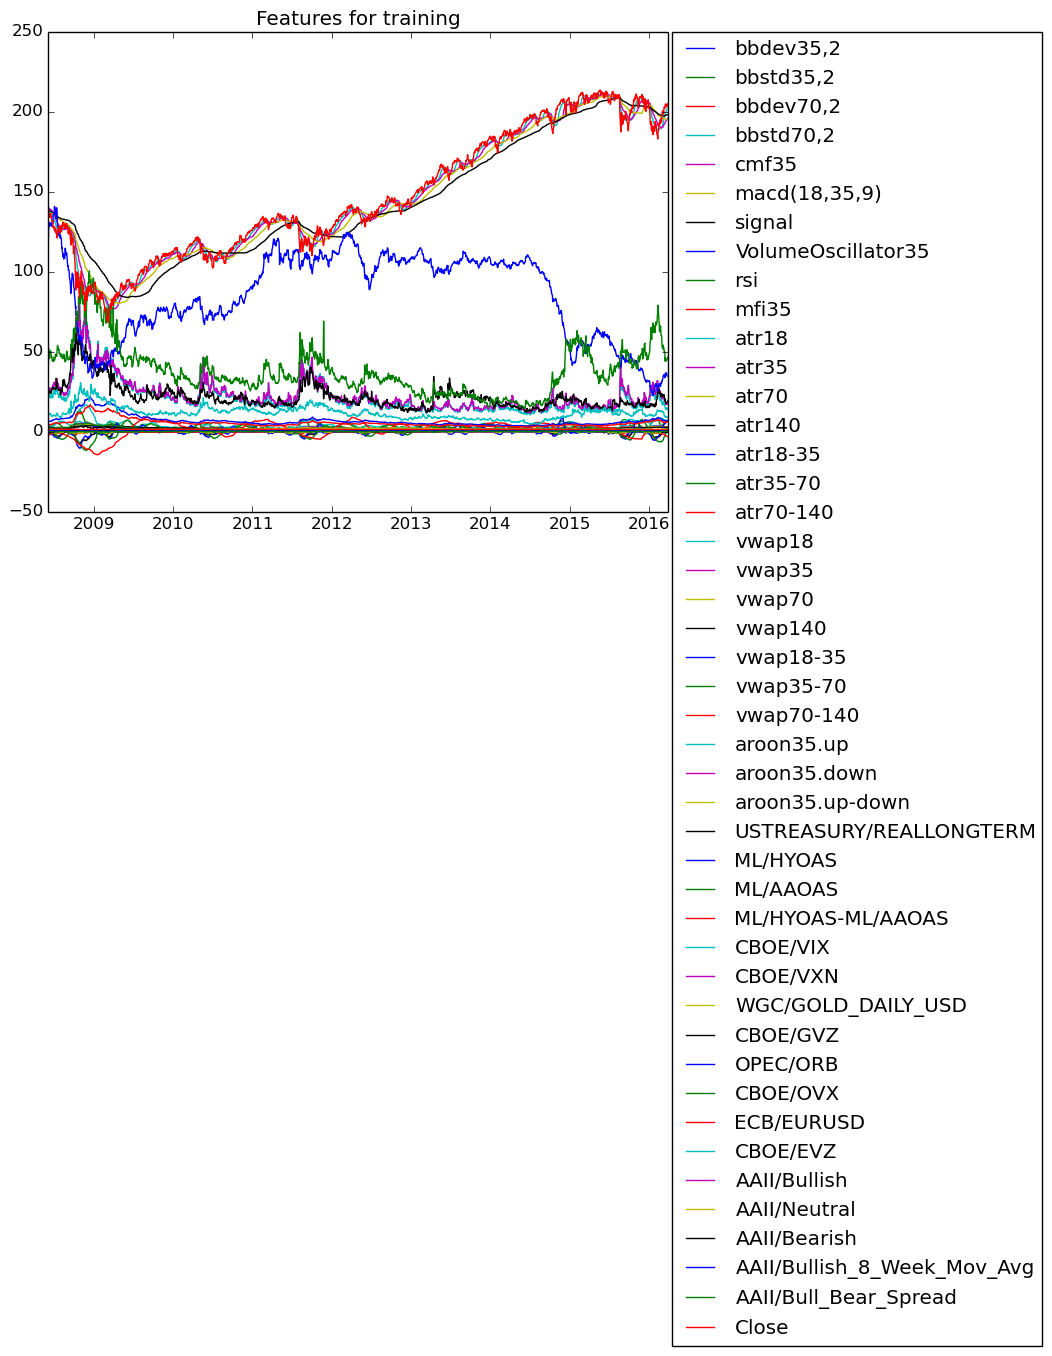

MethodError: MethodError: no method matching writemime(::Base.AbstractIOBuffer{Array{UInt8,1}}, ::MIME{symbol("image/svg+xml")}, ::PyCall.PyObject)
Closest candidates are:
  writemime(::IO, ::MIME{symbol("image/svg+xml")}, ::PyCall.PyObject)
  writemime(::IO, !Matched::AbstractString, ::Any)
  writemime(::IO, !Matched::MIME{symbol("text/csv")}, ::Any)
  ...

In [253]:
plot(withlabel.timestamp,withlabel.values[:,1:closeidx])
legend(withlabel.colnames[1:closeidx],bbox_to_anchor=(1.62, 1.02))
title("Features for training")

In [254]:
using DecisionTree
ntrees=100
features=training.values[:,1:closeidx]
labels=convert(Array{Float64,1},training.values[:,pricerangeidx])
# train regression forest, using 2 random features, 10 trees,
# averaging of 5 samples per leaf (optional), 0.7 of samples per tree (optional)
model = build_forest(labels, features, randomfeaturenum, ntrees, 5, 0.7)

Ensemble of Decision Trees
Trees:      100
Avg Leaves: 414.12
Avg Depth:  25.66

In [255]:
newlabels=apply_forest(model, newfeatures.values);
initvalue=withlabel.values[1,closeidx];

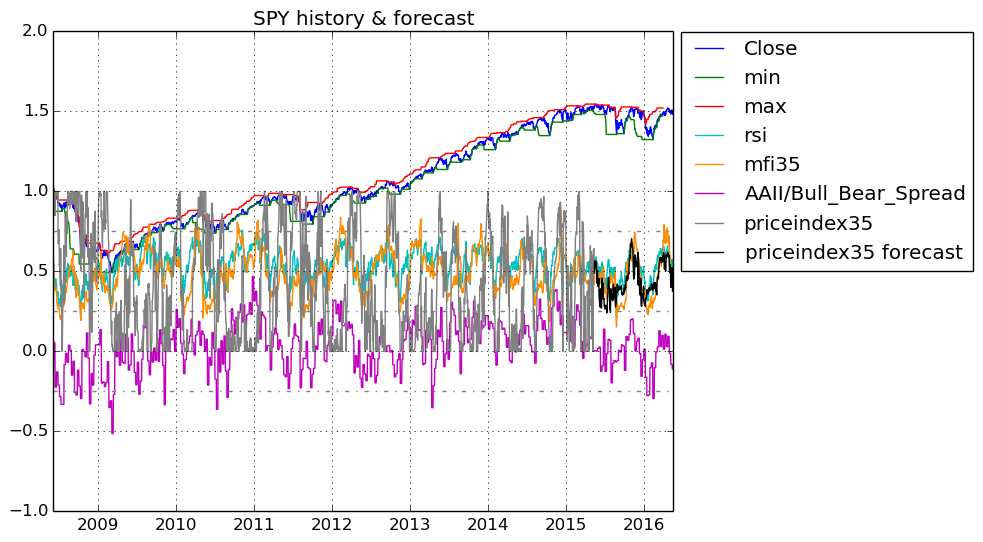

MethodError: MethodError: no method matching writemime(::Base.AbstractIOBuffer{Array{UInt8,1}}, ::MIME{symbol("image/svg+xml")}, ::PyCall.PyObject)
Closest candidates are:
  writemime(::IO, ::MIME{symbol("image/svg+xml")}, ::PyCall.PyObject)
  writemime(::IO, !Matched::AbstractString, ::Any)
  writemime(::IO, !Matched::MIME{symbol("text/csv")}, ::Any)
  ...

In [256]:
plot(withoutlabel.timestamp,withoutlabel.values[:,closeidx]./initvalue)
plot(withlabel.timestamp,withlabel.values[:,closeidx+1:closeidx+2]./initvalue)
plot(withoutlabel.timestamp,withoutlabel.values[:,rsiidx],c="c")
plot(withoutlabel.timestamp,withoutlabel.values[:,mfiidx],c="DarkOrange")
plot(withoutlabel.timestamp,withoutlabel.values[:,bbsidx],c="m")
plot(training.timestamp,training.values[:,pricerangeidx],c="Grey")
plot(newfeatures.timestamp,newlabels,c="k")
title("$symbol history & forecast")
grid("on")
axhline(y=-0.25,ls="-.",c="Grey")
axhline(y=0.25,ls="-.",c="Grey")
axhline(y=0.75,ls="-.",c="Grey")
legend([withlabel.colnames[[closeidx,closeidx+1,closeidx+2,rsiidx,mfiidx,bbsidx,pricerangeidx]];"priceindex$rangelength forecast"],bbox_to_anchor=(1.5, 1.02))

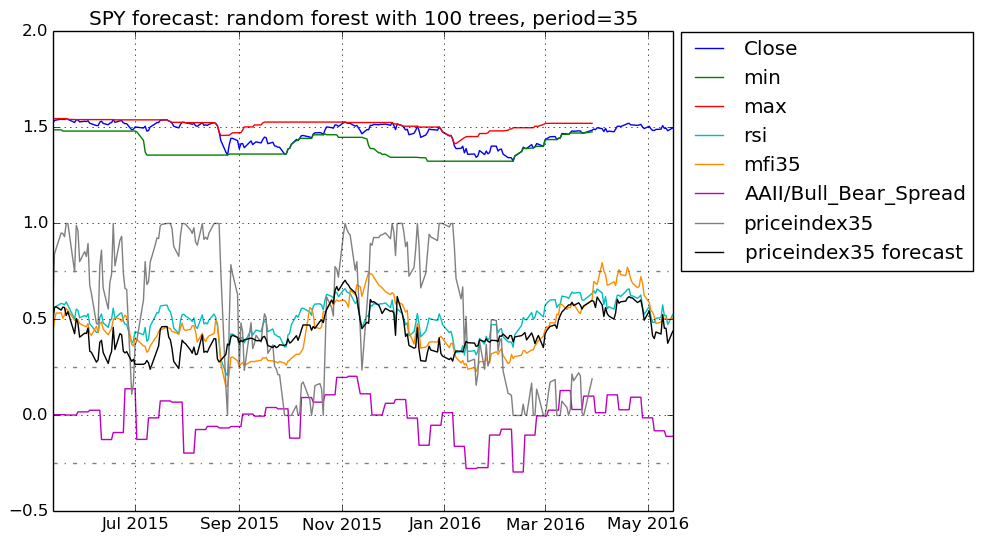

MethodError: MethodError: no method matching writemime(::Base.AbstractIOBuffer{Array{UInt8,1}}, ::MIME{symbol("image/svg+xml")}, ::PyCall.PyObject)
Closest candidates are:
  writemime(::IO, ::MIME{symbol("image/svg+xml")}, ::PyCall.PyObject)
  writemime(::IO, !Matched::AbstractString, ::Any)
  writemime(::IO, !Matched::MIME{symbol("text/csv")}, ::Any)
  ...

In [257]:
plot(newfeatures.timestamp,newfeatures.values[:,closeidx]./initvalue)
plot(test.timestamp,test.values[:,closeidx+1:closeidx+2]./initvalue)
plot(newfeatures.timestamp,newfeatures.values[:,rsiidx],c="c")
plot(newfeatures.timestamp,newfeatures.values[:,mfiidx],c="DarkOrange")
plot(newfeatures.timestamp,newfeatures.values[:,bbsidx],c="m")
plot(test.timestamp,test.values[:,pricerangeidx],c="Grey")
plot(newfeatures.timestamp,newlabels,c="k")
legend([test.colnames[[closeidx,closeidx+1,closeidx+2,rsiidx,mfiidx,bbsidx,pricerangeidx]];"priceindex$rangelength forecast"],bbox_to_anchor=(1.5, 1.02))
title("$symbol forecast: random forest with $ntrees trees, period=$rangelength")
grid("on")
# color names http://astropython.blogspot.ie/2012/02/additional-color-names-for-matplotlib.html
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.axhline
axhline(y=-0.25,ls="-.",c="Grey")
axhline(y=0.25,ls="-.",c="Grey")
axhline(y=0.75,ls="-.",c="Grey")

In [258]:
features=withlabel.values[:,1:closeidx]
labels=convert(Array{Float64,1},withlabel.values[:,pricerangeidx])
# run n-fold cross validation on regression forest
# using 2 random features, 10 trees, 3 folds, averaging of 5 samples/leaf (optional),
# and 0.7 porition of samples per tree (optional)
# returns array of coefficients of determination (R^2)
r2 = nfoldCV_forest(labels, features, 2, ntrees, 3, 5, 0.7)


Fold 1
Mean Squared Error:     0.02061247438944454
Correlation Coeff:      0.9334807518362963
Coeff of Determination: 0.8196160899665805

Fold 2
Mean Squared Error:     0.023271785917026035
Correlation Coeff:      0.930033048699551
Coeff of Determination: 0.8005292295157859

Fold 3

3-element Array{Float64,1}:
 0.819616
 0.800529
 0.814371


Mean Squared Error:     0.02219240745797733
Correlation Coeff:      0.9351593714909412
Coeff of Determination: 0.8143712548691866

Mean Coeff of Determination: 0.811505524783851
